# TOPIC: Understanding Pooling and Padding in CNN

# TOPIC: Exploring LeNet

# TOPIC: Analyzing AlexNet



# Q1 Describe the purpose and benejits of pooling in CNN
Dimension Reduction: Pooling reduces the spatial dimensions (width and height) of the input feature maps, making subsequent computations more computationally efficient.

Feature Invariance: Pooling introduces a level of translation invariance by capturing the most important features in local regions. This makes the network more robust to variations in position or orientation of features.

Benefits:
Computational Efficiency: Pooling reduces the number of computations in the network, making it computationally more efficient.

Increased Receptive Field: Pooling helps to increase the receptive field of higher layers, enabling the network to capture more abstract features.

Robustness: Pooling contributes to the robustness of the network by capturing the most significant features and reducing sensitivity to small variations.


# Q2 Explain the diffecence between min pooling and max pooling
Min Pooling vs. Max Pooling:
Min Pooling: In Min Pooling, the minimum value within a local region is selected as the representative value. This can help capture the least prominent features in the region.

Max Pooling: In Max Pooling, the maximum value within a local region is selected. This is effective for capturing the most prominent features in the region and enhancing the salient characteristics of the input.


# Q3 Discuss the concept oj padding in CNN and its signijicancep
Concept: Padding involves adding extra pixels around the input image or feature map before applying convolutional operations.

Significance:

Preservation of Spatial Information: Padding ensures that spatial information at the edges of the input is preserved during convolutional operations.

Mitigation of Border Effects: It prevents the neglect of pixels at the borders, avoiding information loss and ensuring each pixel has an equal opportunity to be part of the convolution.

# Q4 Compare and contrast zero-padding and valid-padding in terms oj their effects on the output featuce map size.
Zero-padding vs. Valid-padding:
Zero-padding: Extra pixels with zero values are added around the input. It maintains symmetry and ensures that the convolutional kernel processes pixels at the edges, preventing information loss.

Valid-padding: No extra pixels are added. Convolution is applied only to the valid part of the input, leading to a reduction in spatial dimensions.

Effects on Output Feature Map Size:
Zero-padding: Increases the spatial dimensions of the output feature map compared to the input.

Valid-padding: Reduces the spatial dimensions of the output feature map compared to the input.

#  Topic : Exploring lenet
#  Q1 Provide a brief overview of lenet 5 architecture
Description of Key Components and Their Purposes:
Input Layer:

Purpose: Accepts the input image data, typically in grayscale for LeNet-5.
Convolutional Layers (C1 to C5):

Purpose: These layers perform convolution operations on the input image to extract hierarchical features. C1 to C3 use a 5x5 convolutional kernel, while C4 and C5 use 3x3 kernels.
Activation Function (Sigmoid):

Purpose: The Sigmoid activation function is used in the hidden layers to introduce non-linearity.
Subsampling Layers (S2, S4):

Purpose: These layers, also known as pooling layers, reduce the spatial dimensions of the feature maps, aiding in dimensionality reduction and translational invariance.
Fully Connected Layers (F6, Output Layer):

Purpose: The fully connected layers process the high-level features and perform classification. The output layer produces the final class probabilities using the softmax activation function.
Flatten Layer:

Purpose: Flattens the output from the last convolutional layer before feeding it into the fully connected layers.

#  Q2 Describe the key component of Lenet 5 and their respective purpose
Input Layer:

Purpose: The input layer is where the raw pixel values of the input image are fed into the network. For LeNet-5, the input is typically a grayscale image.
Convolutional Layers (C1 to C5):

Purpose: LeNet-5 includes three convolutional layers (C1, C3, and C5). These layers perform convolution operations on the input image to extract various levels of features and patterns. Each convolutional layer uses a set of learnable filters or kernels to convolve with the input, capturing spatial hierarchies.
Activation Function (Sigmoid):

Purpose: Sigmoid activation functions (sigmoidal neurons) are applied after each convolutional layer. The purpose is to introduce non-linearity to the network, enabling it to learn complex relationships and patterns within the data.
Subsampling Layers (S2 and S4):

Purpose: Subsampling layers, also known as pooling layers, are used to reduce the spatial dimensions of the feature maps produced by the convolutional layers. This helps in achieving translation invariance and reduces the computational load in subsequent layers.
Fully Connected Layers (F6 and Output Layer):

Purpose: The fully connected layers process the high-level features extracted by the previous layers and perform classification. The F6 layer connects to the S4 layer, and the output layer produces the final class probabilities using the softmax activation function.
Flatten Layer:

Purpose: Before entering the fully connected layers, a flatten layer is employed. This layer reshapes the output from the last subsampling layer into a flat vector, preparing it for the fully connected layers.


 
#  Q3 Discuss the advantages and limitations of LeNet-5 in the context of image classification tasks
Advantages:
Pioneering Architecture: LeNet-5 was one of the first successful convolutional neural networks designed for image recognition tasks.

Hierarchical Feature Extraction: The architecture captures hierarchical features through convolutional and subsampling layers, making it effective for image analysis.

Translation Invariance: Subsampling layers contribute to translation invariance, allowing the network to recognize patterns irrespective of their precise location.

Limitations:
Limited Capacity: Compared to modern architectures, LeNet-5 has a relatively small capacity and may struggle with more complex datasets and tasks.

Sigmoid Activation: The use of the sigmoid activation function in hidden layers can lead to the vanishing gradient problem, affecting the training of deep networks.
    


#  Q4 Implement LeNet-5 using a deep learning framework  of choice (e.g., TensrcFlow, PyTorch) and train it on a public available dataset (e.g., MNIST). Evaluate its performance and provide insights.

In [12]:
!pip install tensorflow
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [22]:

# one hot encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)


In [23]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(6,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 6)           906       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 6)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0489 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0621 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0422 - val_accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0570 - val_ac

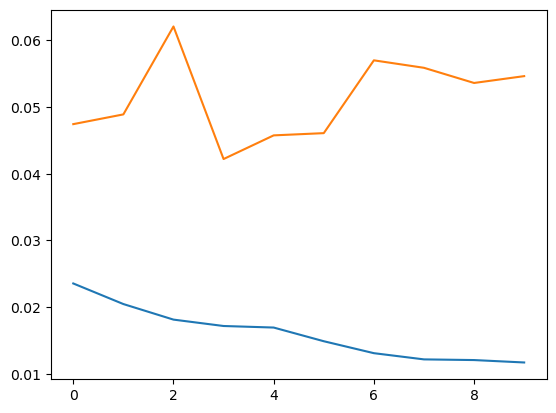

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

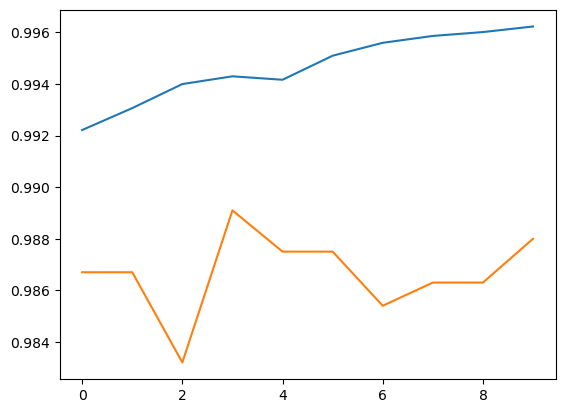

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

#  Topic: Anaylising alxenet
    
#   Q1 Present an overview of the alexnet architecture
Input Layer:

The input layer receives color images with a fixed size of 224x224 pixels. AlexNet was designed to handle RGB images, so the input has three channels (red, green, and blue).
Convolutional Layers (Conv1 to Conv5):

AlexNet consists of five convolutional layers (Conv1 to Conv5). These layers perform feature extraction through convolutions with learnable filters. The convolutional layers are followed by Rectified Linear Unit (ReLU) activation functions to introduce non-linearity.
Local Response Normalization (LRN):

After some of the convolutional layers, local response normalization (LRN) is applied. LRN normalizes the responses across neighboring channels, enhancing the contrast between feature maps.
Max Pooling Layers (Pool1 to Pool3):

Max pooling layers follow some of the convolutional layers (Pool1 to Pool3). These layers down-sample the spatial dimensions of the feature maps, reducing computational complexity and introducing translational invariance. Importantly, overlapping pooling regions are used, distinguishing AlexNet from earlier architectures.
Flatten Layer:

The output from the last pooling layer is flattened into a vector to prepare it for the fully connected layers.
Fully Connected Layers (FC6 and FC7):

AlexNet includes two fully connected layers (FC6 and FC7) that process the high-level features extracted by the convolutional and pooling layers. These layers use ReLU activation functions and incorporate dropout regularization to prevent overfitting.
Output Layer (FC8):

The final fully connected layer (FC8) produces the class scores. It typically has 1,000 units corresponding to the 1,000 ImageNet classes. The softmax activation function is applied to convert the scores into class probabilities.


#   Q2 Explain the architecture innovation introduce in alexnet that contributed to its breakthrough performance
Deep Architecture:

AlexNet was one of the first deep convolutional neural networks (CNNs) designed for image classification. It consists of eight layers, including five convolutional layers and three fully connected layers.
Rectified Linear Units (ReLU) Activation:

AlexNet used the rectified linear unit (ReLU) activation function, which accelerates the training process by mitigating the vanishing gradient problem compared to traditional activation functions like sigmoid.
Local Response Normalization (LRN):

LRN was applied after some of the convolutional layers to enhance contrast between feature maps. It promotes the activation of neurons with higher responses relative to their neighbors.
Overlapping Pooling:

AlexNet introduced a max pooling layer with overlapping regions, which was a departure from the non-overlapping pooling used in previous architectures. Overlapping pooling helps retain spatial information and reduces the risk of discarding important features.

#   Q3 Discuss thr role of convolutional layer,polling layer,fully connected layers in alexnet
1. Convolutional Layers:
Functionality: Convolutional layers are responsible for extracting hierarchical features from input images. They apply convolutional operations using learnable filters (kernels) to capture local patterns and structures.

Role in AlexNet:

AlexNet has five convolutional layers (Conv1 to Conv5).
The early layers (Conv1 and Conv2) capture low-level features like edges and textures.
Deeper layers (Conv3 to Conv5) capture more complex and abstract features.
Activation Function:

ReLU activation functions follow each convolutional layer, introducing non-linearity and aiding in the learning of complex patterns.
2. Pooling Layers:
Functionality: Pooling layers down-sample the spatial dimensions of feature maps, reducing computational complexity and introducing translational invariance. Pooling helps retain important information while discarding less critical details.

Role in AlexNet:

AlexNet uses max pooling layers with overlapping regions (Pool1 to Pool3).
Overlapping pooling helps retain more spatial information compared to non-overlapping pooling.
Spatial Reduction:

By reducing the spatial dimensions, pooling layers contribute to translation invariance, allowing the network to recognize patterns irrespective of their precise location.
3. Fully Connected Layers:
Functionality: Fully connected layers process high-level features and perform classification based on the learned representations. They connect all neurons from one layer to all neurons in the next layer.

Role in AlexNet:

AlexNet includes three fully connected layers (FC6, FC7, and FC8).
FC6 and FC7 process features extracted by convolutional and pooling layers.
FC8 produces the final class scores.
Dropout Regularization:

Dropout is applied in FC6 and FC7 to prevent overfitting by randomly dropping out neurons during training.
Output Layer:

The final fully connected layer (FC8) produces class scores, and the softmax activation function converts these scores into class probabilities
 

#  Q4 Implement Alexnet using a deep learning framework of your choice and evaluate its performance on a data set of ypur choice 

In [40]:
! pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(y_test,x_test) = mnist.load_data()

In [43]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train/255
x_test = x_test/255

# one hot encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)


In [52]:
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding="valid", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(l)

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_30. Consider increasing the input size. Received input shape [None, 1, 1, 256] which would produce output shape with a zero or negative value in a dimension.